# Trasformar los datos

In [1]:
import xml.etree.ElementTree as ET

tree = ET.parse(r"C:\Users\cr-19\Desktop\Strava\Bicicleta_el_ctrica_a_la_hora_del_almuerzo.gpx")
root = tree.getroot()

ns = {'gpx': 'http://www.topografix.com/GPX/1/1'}

track_name = root.find('gpx:trk/gpx:name', ns).text
track_type = root.find('gpx:trk/gpx:type', ns).text

track_points = []
for trkpt in root.findall('gpx:trk/gpx:trkseg/gpx:trkpt', ns):
    lat = trkpt.attrib['lat']
    lon = trkpt.attrib['lon']
    ele = trkpt.find('gpx:ele', ns).text
    time = trkpt.find('gpx:time', ns).text
    track_points.append({'lat': lat, 'lon': lon, 'ele': ele, 'time': time})

print("Nombre del track:", track_name)
print("Tipo de track:", track_type)
print("Puntos del track:")
for point in track_points:
    print("Latitud:", point['lat'], "Longitud:", point['lon'], "Elevación:", point['ele'], "Tiempo:", point['time'])



Nombre del track: Bicicleta eléctrica a la hora del almuerzo
Tipo de track: ebikeride
Puntos del track:
Latitud: 6.2653780 Longitud: -75.5751000 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:29Z
Latitud: 6.2653940 Longitud: -75.5751090 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:30Z
Latitud: 6.2654000 Longitud: -75.5751150 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:31Z
Latitud: 6.2654050 Longitud: -75.5751210 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:32Z
Latitud: 6.2654100 Longitud: -75.5751280 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:33Z
Latitud: 6.2654150 Longitud: -75.5751340 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:34Z
Latitud: 6.2654210 Longitud: -75.5751400 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:35Z
Latitud: 6.2654260 Longitud: -75.5751470 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:36Z
Latitud: 6.2654310 Longitud: -75.5751530 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:37Z
Latitud: 6.2654360 Longitud: -75.5751590 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:38Z
Latitud: 6.26544

# Creación del dataframe

In [2]:
import pandas as pd

data = [
    {"latitud": "6.2653780", "longitud": "-75.5751000", "elevacion": "1465.7", "tiempo": "2024-04-29T17:32:29Z"},
    {"latitud": "6.2653940", "longitud": "-75.5751090", "elevacion": "1465.7", "tiempo": "2024-04-29T17:32:30Z"},
    {"latitud": "6.2654000", "longitud": "-75.5751150", "elevacion": "1465.7", "tiempo": "2024-04-29T17:32:31Z"},
]

df = pd.DataFrame(data)

In [3]:
data = []
for point in track_points:
    data.append({
        "latitud": point['lat'],
        "longitud": point['lon'],
        "elevacion": point['ele'],
        "tiempo": point['time']
    })

df = pd.DataFrame(data)

In [4]:
df['latitud'] = df['latitud'].astype(float)
df['longitud'] = df['longitud'].astype(float)
df['elevacion'] = df['elevacion'].astype(float)
df['tiempo'] = pd.to_datetime(df['tiempo'], format='%Y-%m-%dT%H:%M:%SZ')

In [5]:
df.reset_index(inplace=False)
df.insert(0, 'conteo', range(1, len(df) + 1))
# df.set_index('tiempo', inplace=True)
print(df)

     conteo   latitud   longitud  elevacion              tiempo
0         1  6.265378 -75.575100     1465.7 2024-04-29 17:32:29
1         2  6.265394 -75.575109     1465.7 2024-04-29 17:32:30
2         3  6.265400 -75.575115     1465.7 2024-04-29 17:32:31
3         4  6.265405 -75.575121     1465.7 2024-04-29 17:32:32
4         5  6.265410 -75.575128     1465.7 2024-04-29 17:32:33
..      ...       ...        ...        ...                 ...
800     801  6.214932 -75.557796     1687.1 2024-04-29 17:46:54
801     802  6.215033 -75.557849     1687.4 2024-04-29 17:46:55
802     803  6.215137 -75.557899     1687.8 2024-04-29 17:46:56
803     804  6.215238 -75.557928     1688.3 2024-04-29 17:46:57
804     805  6.215321 -75.557932     1688.7 2024-04-29 17:46:58

[805 rows x 5 columns]


In [6]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Leostark95/Strava/main/df_velocidad.csv'

df_velocidad = pd.read_csv(url, delimiter=';', encoding='latin1')
df_velocidad.rename(columns={'ï»¿Number': 'conteo'}, inplace=True)
df_velocidad.rename(columns={'Leg Length': 'Leg_Length', 'Leg Speed': 'Leg_Speed'}, inplace=True)


In [7]:
df = pd.merge(df, df_velocidad[['conteo', 'Leg_Length', 'Leg_Speed']], on='conteo', how='left')

In [8]:
import re
df['Leg_Speed'] = df['Leg_Speed'].str.extract('(\d+)')

In [9]:
df[df.isna().any(axis=1)]

,conteo,latitud,longitud,elevacion,tiempo,Leg_Length,Leg_Speed
804,805,6.215321,-75.557932,1688.7,2024-04-29 17:46:58,NaN,NaN


In [10]:
df = df.dropna()

In [11]:
df['Leg_Length'] = df['Leg_Length'].astype(int)
df['Leg_Speed'] = df['Leg_Speed'].astype(float)

In [12]:
df.head()

,conteo,latitud,longitud,elevacion,tiempo,Leg_Length,Leg_Speed
0,1,6.265378,-75.575100,1465.7,2024-04-29 17:32:29,2,7.0
1,2,6.265394,-75.575109,1465.7,2024-04-29 17:32:30,1,3.0
2,3,6.265400,-75.575115,1465.7,2024-04-29 17:32:31,1,3.0
3,4,6.265405,-75.575121,1465.7,2024-04-29 17:32:32,1,3.0
4,5,6.265410,-75.575128,1465.7,2024-04-29 17:32:33,1,3.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 0 to 803
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   conteo      804 non-null    int64         
 1   latitud     804 non-null    float64       
 2   longitud    804 non-null    float64       
 3   elevacion   804 non-null    float64       
 4   tiempo      804 non-null    datetime64[ns]
 5   Leg_Length  804 non-null    int32         
 6   Leg_Speed   804 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1)
memory usage: 47.1 KB


In [14]:
df.describe()

,conteo,latitud,longitud,elevacion,Leg_Length,Leg_Speed
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,402.500000,6.238486,-75.570218,1520.287189,9.534826,34.308458
std,232.239101,0.015142,0.005234,65.601902,3.753956,13.648473
min,1.000000,6.214456,-75.576056,1463.000000,0.000000,0.000000
25%,201.750000,6.225839,-75.575132,1473.900000,8.000000,28.000000
50%,402.500000,6.238338,-75.572399,1482.500000,11.000000,38.000000
75%,603.250000,6.251351,-75.565951,1564.025000,12.000000,44.000000
max,804.000000,6.265447,-75.557327,1688.700000,24.000000,85.000000


In [16]:
df.set_index('tiempo', inplace=True)
serie_tiempo = df['elevacion']

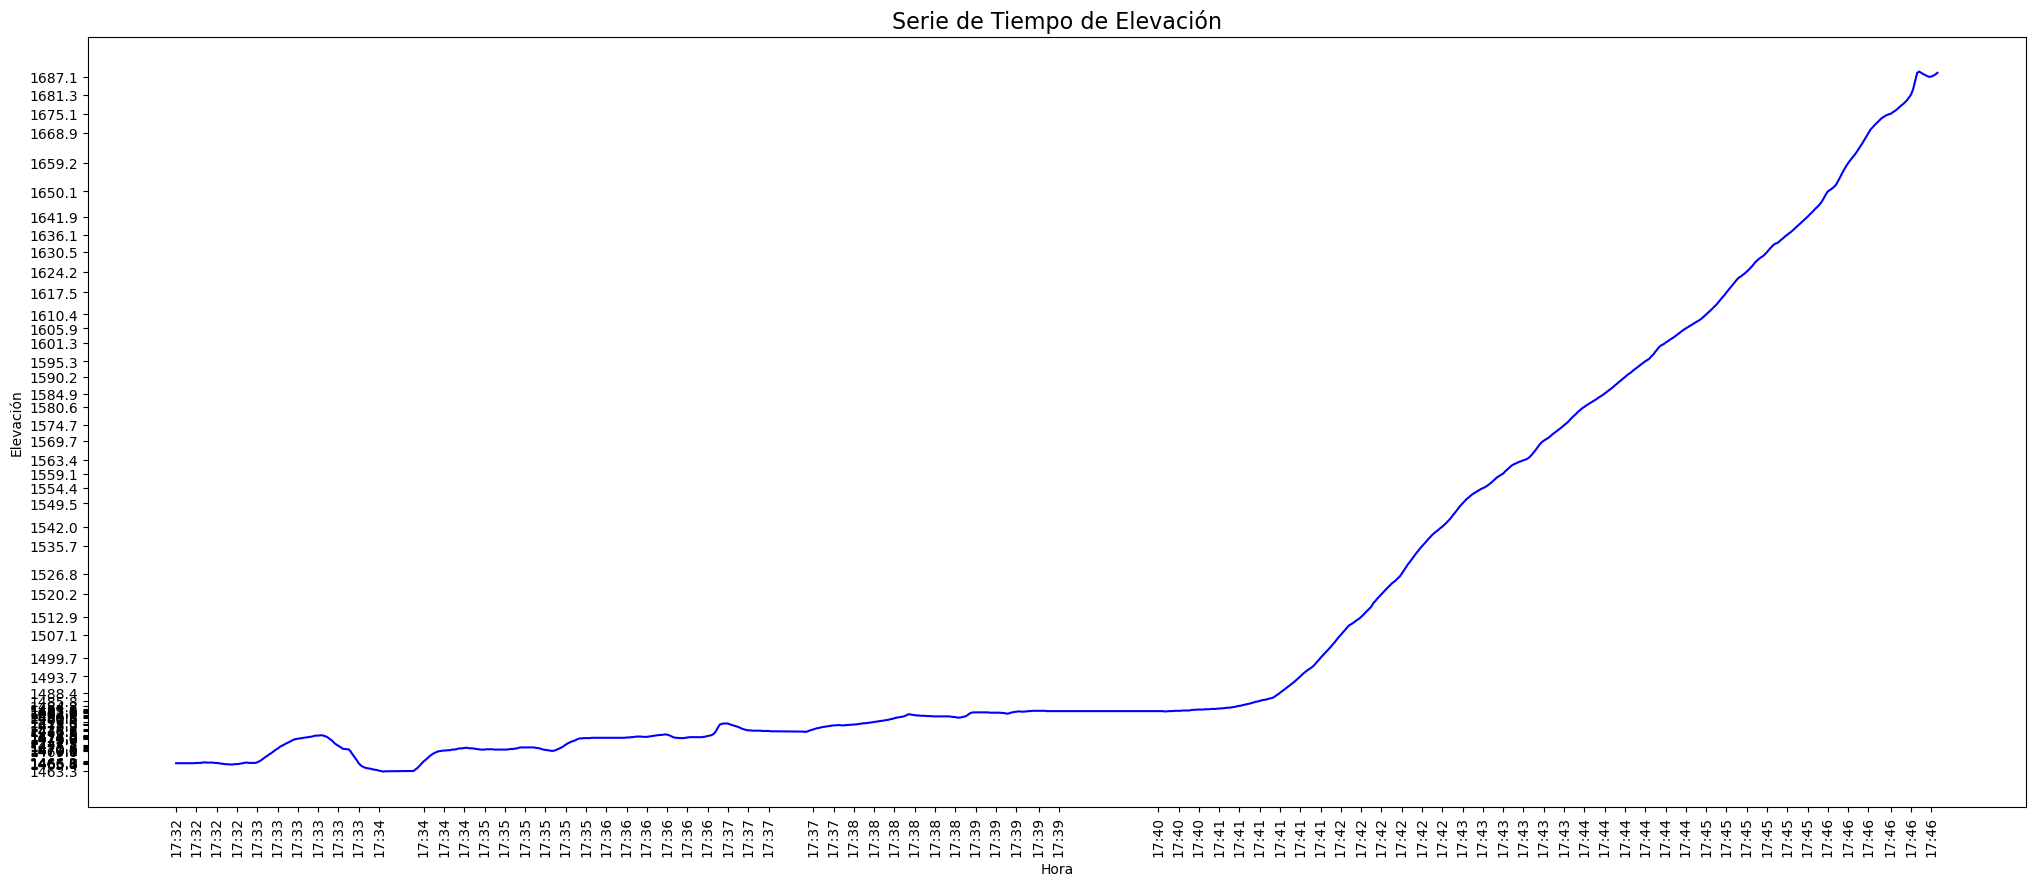

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que serie_tiempo es tu serie de tiempo
# Asegúrate de que el índice sea de tipo datetime
serie_tiempo.index = pd.to_datetime(serie_tiempo.index)

# Obtener los índices y valores de la serie de tiempo
indices = serie_tiempo.index
valores = serie_tiempo.values

# Obtener los índices y valores cada 10 elementos
indices_10 = indices[::10]
valores_10 = valores[::10]

# Formatear los índices para mostrar solo la hora
indices_formatted = indices.strftime('%H:%M')

plt.figure(figsize=(25, 10))
plt.plot(indices, valores, color='blue')
plt.title('Serie de Tiempo de Elevación', fontsize=16)
plt.xlabel('Hora', fontsize=10)
plt.ylabel('Elevación', fontsize=10)
plt.xticks(indices_10, labels=indices_formatted[::10], rotation=90, fontsize=10)
plt.yticks(valores_10, fontsize=10)
plt.show()


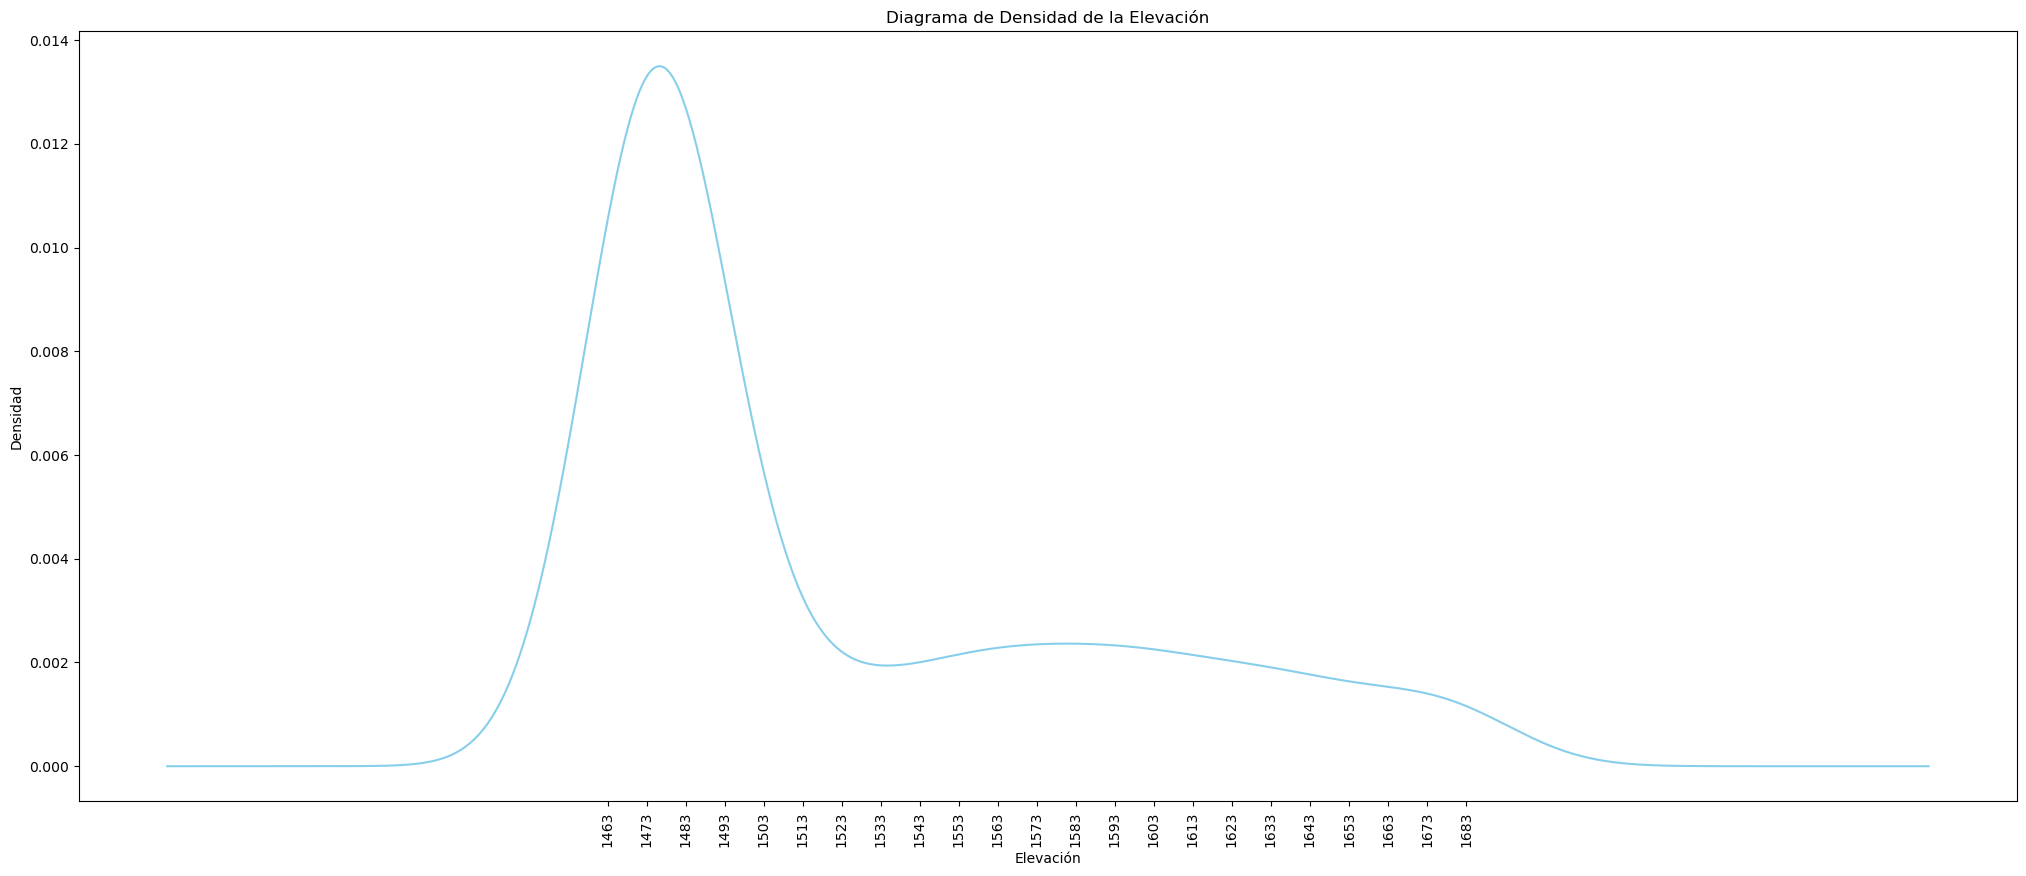

In [37]:
plt.figure(figsize=(25, 10))
df['elevacion'].plot.density(color='skyblue')
plt.title('Diagrama de Densidad de la Elevación')
plt.xlabel('Elevación')
plt.ylabel('Densidad')
plt.xticks(rotation=90, ticks=range(int(df['elevacion'].min()), int(df['elevacion'].max()) + 1, 10))
plt.show()


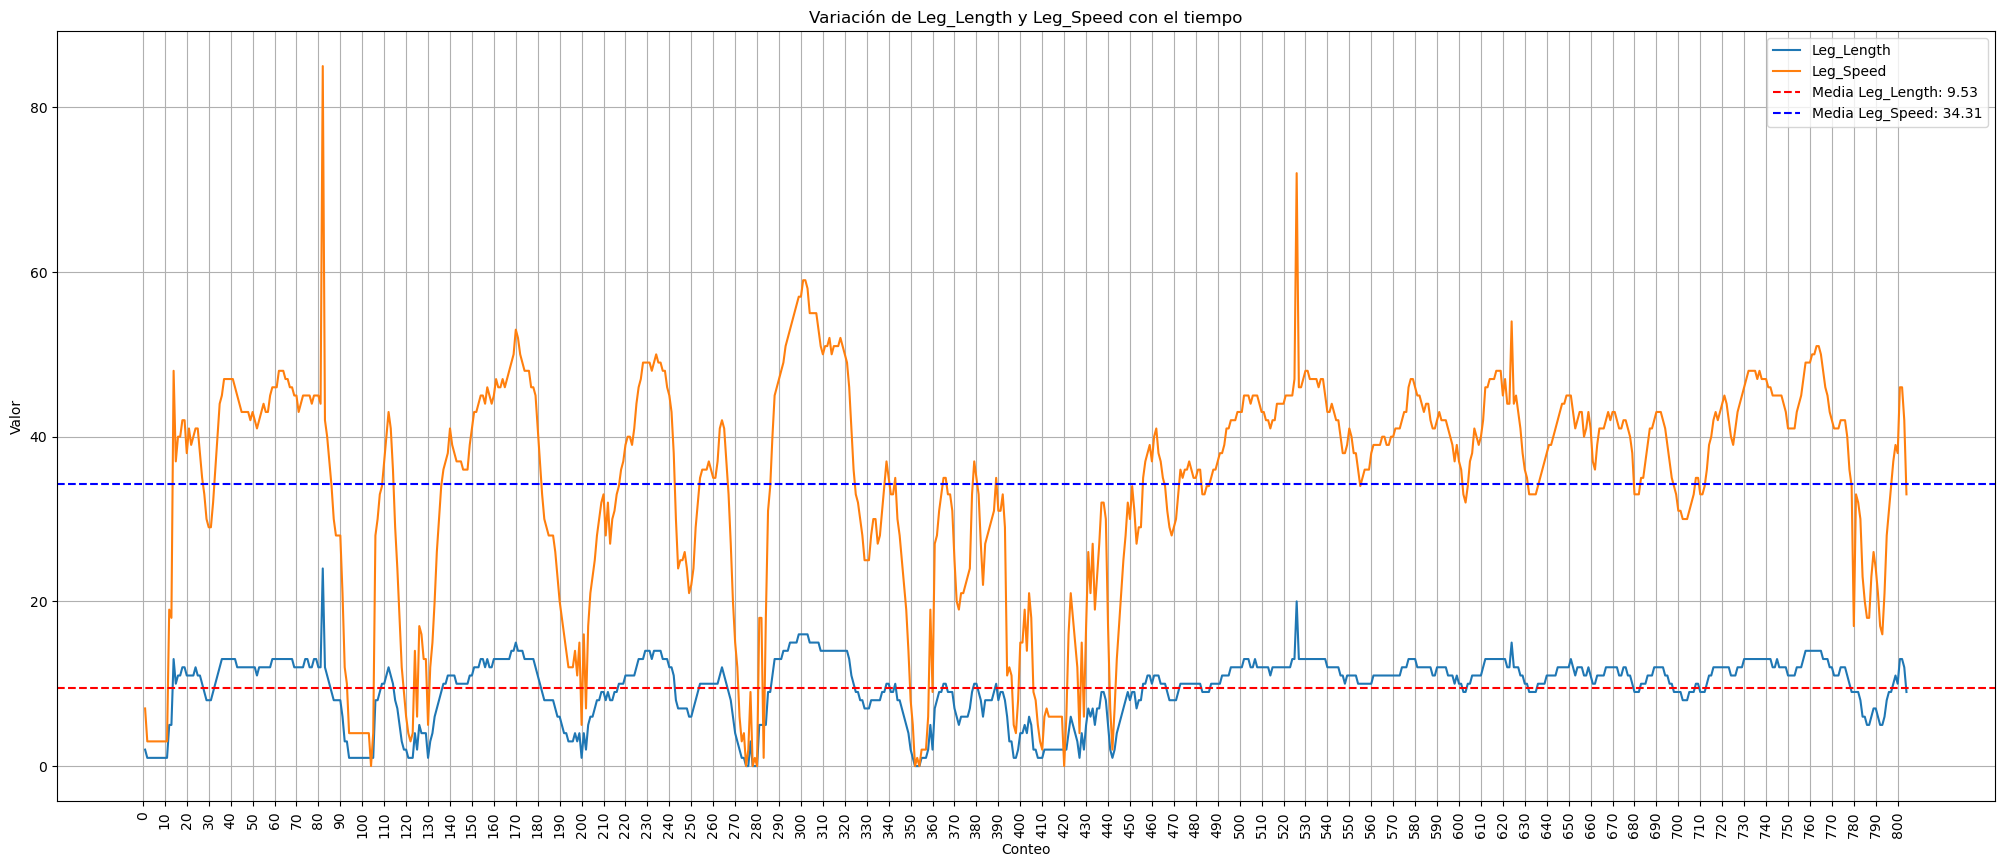

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))

plt.plot(df['conteo'], df['Leg_Length'], label='Leg_Length')
plt.plot(df['conteo'], df['Leg_Speed'], label='Leg_Speed')

mean_leg_length = df['Leg_Length'].mean()
plt.axhline(y=mean_leg_length, color='red', linestyle='--', label=f'Media Leg_Length: {mean_leg_length:.2f}')

mean_leg_speed = df['Leg_Speed'].mean()
plt.axhline(y=mean_leg_speed, color='blue', linestyle='--', label=f'Media Leg_Speed: {mean_leg_speed:.2f}')

plt.title('Variación de Leg_Length y Leg_Speed con el tiempo')
plt.xlabel('Conteo')
plt.ylabel('Valor')
plt.xticks(rotation=90)
plt.xticks(range(0, len(df['conteo']) + 1, 10))
plt.legend()
plt.grid(True)
plt.show()


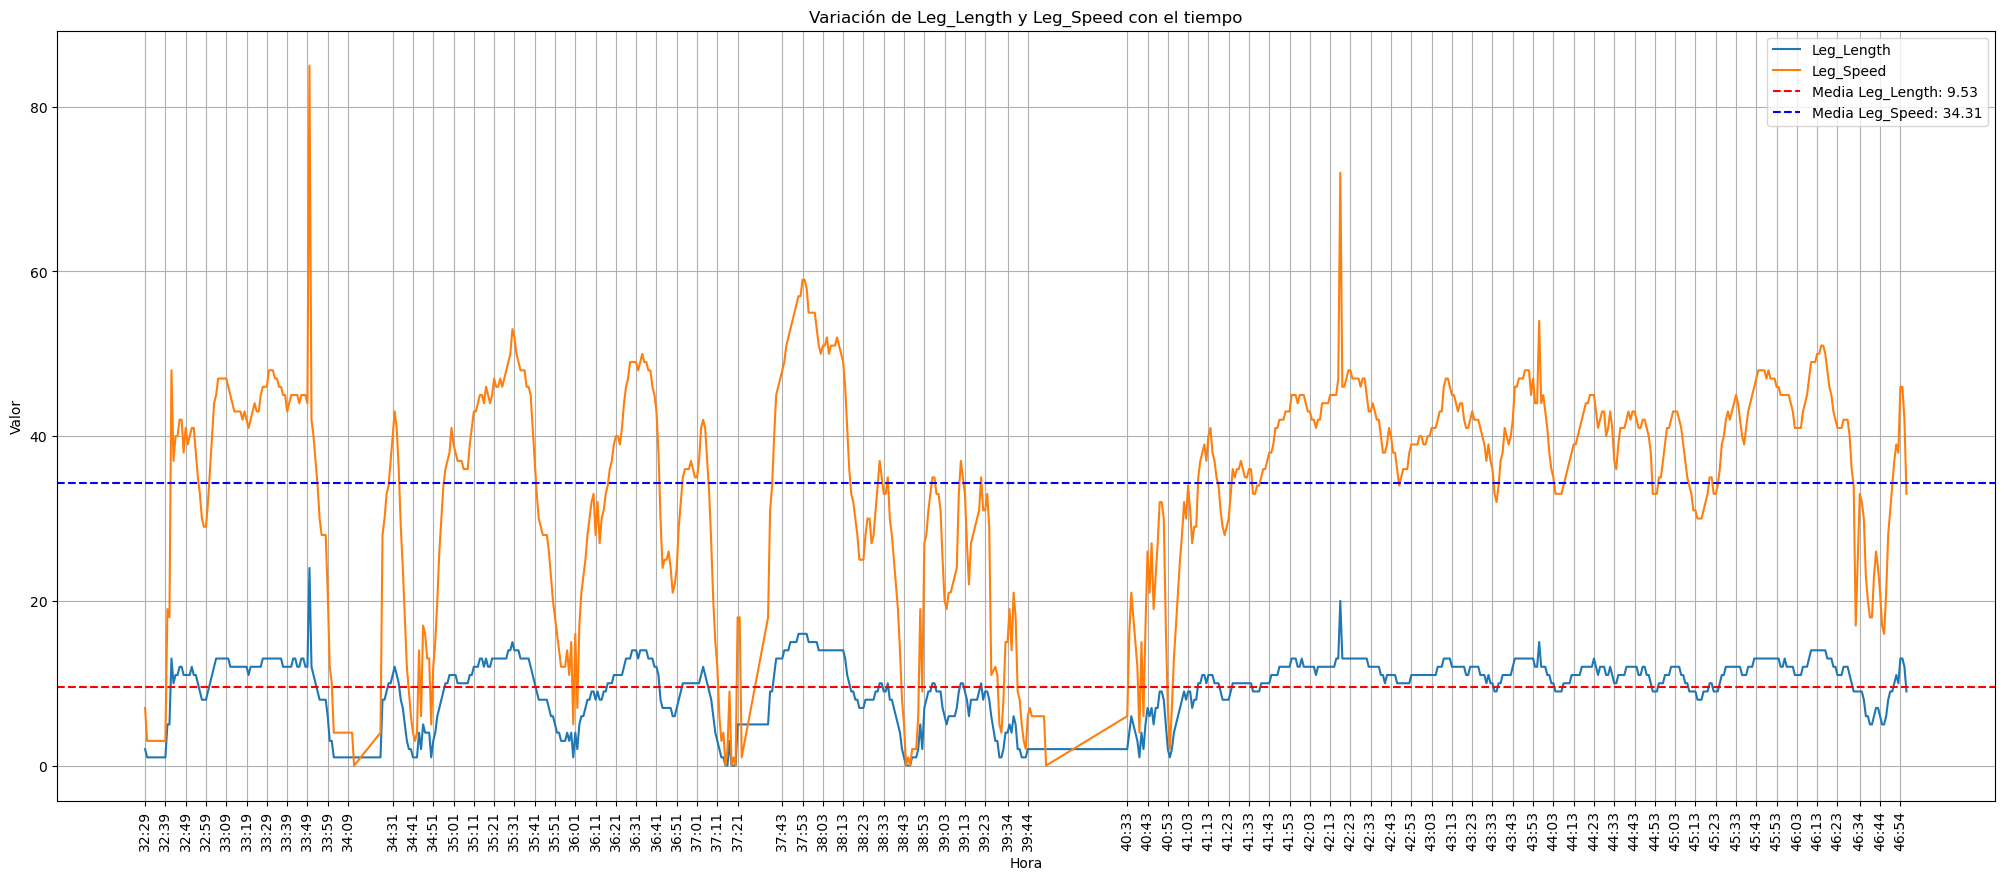

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))

plt.plot(df.index, df['Leg_Length'], label='Leg_Length')
plt.plot(df.index, df['Leg_Speed'], label='Leg_Speed')

mean_leg_length = df['Leg_Length'].mean()
plt.axhline(y=mean_leg_length, color='red', linestyle='--', label=f'Media Leg_Length: {mean_leg_length:.2f}')

mean_leg_speed = df['Leg_Speed'].mean()
plt.axhline(y=mean_leg_speed, color='blue', linestyle='--', label=f'Media Leg_Speed: {mean_leg_speed:.2f}')

plt.title('Variación de Leg_Length y Leg_Speed con el tiempo')
plt.xlabel('Hora')
plt.ylabel('Valor')
plt.xticks(rotation=90)
plt.xticks(df.index[::10], df.index.strftime('%M:%S')[::10])
plt.legend()
plt.grid(True)
plt.show()
